In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data_path = 'data/sensor_metrics.csv'
df = pd.read_csv(data_path)
df.head()

,Unnamed: 0,date,field,value,device_id
0,0,2022-05-23 05:21:20.242008+00:00,battery_voltage,14.99837,SB1001
1,1,2022-05-23 05:21:51.183225+00:00,battery_voltage,14.99837,SB1001
2,2,2022-05-23 05:22:22.381353+00:00,battery_voltage,14.99837,SB1001
3,3,2022-05-23 05:22:52.605236+00:00,battery_voltage,14.99837,SB1001
4,4,2022-05-23 05:23:22.870146+00:00,battery_voltage,14.99837,SB1001


In [6]:
df['field'].value_counts()

battery_voltage    136464
data_balance       136464
db_level           136464
last_recorded      136464
last_uploaded      136464
panel_voltage      136464
signal_strength    136464
Name: field, dtype: int64

In [7]:
values=['db_level']
df.query("field in @values")

,Unnamed: 0,date,field,value,device_id
272928,272928,2022-05-23 05:21:20.257379+00:00,db_level,80.15035,SB1001
272929,272929,2022-05-23 05:21:51.194415+00:00,db_level,70.13739,SB1001
272930,272930,2022-05-23 05:22:22.392657+00:00,db_level,102.26990,SB1001
272931,272931,2022-05-23 05:22:52.616672+00:00,db_level,78.22692,SB1001
272932,272932,2022-05-23 05:23:22.881239+00:00,db_level,65.71063,SB1001
...,...,...,...,...,...
409387,409387,2022-05-26 22:27:31.855684+00:00,db_level,79.60939,SB1013
409388,409388,2022-05-26 22:28:02.936844+00:00,db_level,54.64372,SB1013
409389,409389,2022-05-26 22:30:59.937044+00:00,db_level,0.00000,SB1013
409390,409390,2022-05-26 22:31:30.896429+00:00,db_level,0.00000,SB1013


In [10]:
newdb_level=df.query("field in @values")
sensors=df['device_id'].value_counts()
print(sensors)

SB1007    619962
SB1005    127694
SB1012    103747
SB1001     54376
SB1006     26558
SB1002     17794
SB1013      4802
SB1008       315
Name: device_id, dtype: int64


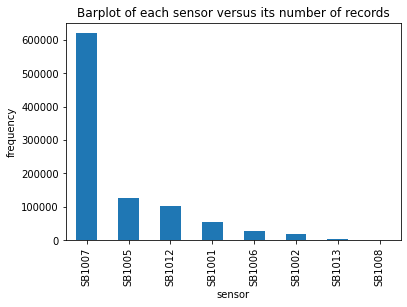

In [11]:
fig,ax = plt.subplots()
sensors.plot(ax = ax, kind = 'bar', ylabel = 'frequency',xlabel='sensor')
plt.title('Barplot of each sensor versus its number of records')
plt.show()

In [13]:
time=pd.to_datetime(df['date']).dt.time
print(time)

0         05:21:20.242008
1         05:21:51.183225
2         05:22:22.381353
3         05:22:52.605236
4         05:23:22.870146
               ...       
955243    22:27:31.852231
955244    22:28:02.933391
955245    22:30:59.933363
955246    22:31:30.892709
955247    22:32:01.219158
Name: date, Length: 955248, dtype: object


In [20]:
data_lineplot=pd.DataFrame({"db_level","sensor"}, index=time)
line=data_lineplot.plot.line()
print(line)

ValueError: Shape of passed values is (2, 1), indices imply (955248, 1)